In [1]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [165]:
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

In [166]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
# features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

In [167]:
len(target)

79

In [168]:
target[0:1]

[600000.0]

In [169]:
len(features)

79

In [170]:
features[0:1]

[array([ 365788.])]

In [171]:
### training-testing split needed in regression, just like classification
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)

# swap train and test data
feature_tmp = feature_train
target_tmp = target_train

feature_train = feature_test
target_train = target_test

feature_test = feature_tmp
target_test = target_tmp


In [172]:
len(feature_train)

40

In [173]:
type(feature_train)

list

In [174]:
len(feature_test)

39

In [175]:
type(feature_test)

list

In [176]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(feature_train, target_train)
print reg.coef_
print reg.intercept_

[ 2.27410114]
124444.388866


In [177]:
reg.score(feature_train, target_train)

0.251488150398397

In [178]:
reg.score(feature_test, reg.predict(feature_test))

1.0

In [179]:
reg.score(feature_test, target_test)

-0.12359798540343814

In [180]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt

In [181]:
train_color = "b"
test_color = "r"
plt.scatter(feature_train, target_train, color=train_color, label="train")
plt.scatter(feature_test, target_test, color=test_color, label="test")

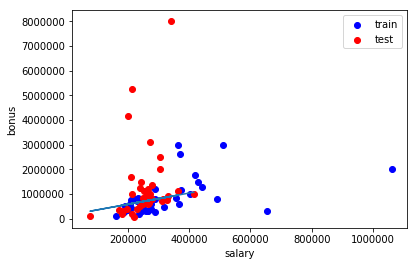

In [182]:
### draw the regression line, once it's coded
try:
    plt.plot(feature_test, reg.predict(feature_test))
except NameError:
    pass
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()